In [1]:
# Mohit Jain 
# Date - 7 June, 2020

<h1> Module 4 : </h1>

In [2]:
#importing necessary libraries : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv("week3.csv")
df.drop(["Unnamed: 0"], axis = 1, inplace = True)
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,...,0.000000,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
1,2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,...,0.362566,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2,2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,...,-0.230366,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
3,2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,...,0.939337,Slight Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN
4,2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,...,-0.395113,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN


<h3> Question 1 : </h3>

In [4]:
# Part 1 - 

In [5]:
def call(row):
    if row["Close Price"] < row["14_day_bollinger_lower"]: return "Buy"
    if row["Close Price"] > row["14_day_bollinger_upper"]: return "Short"
    if row["Close Price"] == row["14_day_bollinger_upper"]: return "Hold"
    if row["Close Price"] > row["14_day_SMA"]: return "Hold Buy / Liquidate Short"
    if row["Close Price"] < row["14_day_SMA"]: return "Hold Short / Liquidate Buy"

df["Call"] = df.apply(call, axis = 1)
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
0,2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
1,2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
2,2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
3,2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,...,Slight Positive,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
4,2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,...,Slight or No Change,NaN,NaN,NaN,HODL,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,...,Slight Positive,0.042474,738.147619,736.216176,HODL,729.810714,10.288365,750.387444,709.233984,Hold Short / Liquidate Buy
490,2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,...,Slight Negative,0.041786,736.530952,736.539706,SELL,727.782143,9.223936,746.230016,709.334270,Hold Short / Liquidate Buy
491,2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,...,Slight or No Change,0.038670,735.252381,736.613235,HODL,727.321429,9.398542,746.118512,708.524346,Hold Short / Liquidate Buy
492,2019-05-10,INFY,EQ,721.05,720.80,726.00,715.00,716.50,716.85,717.88,...,Slight Negative,0.029632,733.230952,736.808824,HODL,726.803571,9.781625,746.366821,707.240322,Hold Short / Liquidate Buy


In [6]:
# Part 2 - 

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
x = df[["Close Price", "14_day_STD", "14_day_bollinger_upper", "14_day_bollinger_lower" ]].dropna()
y = df["Call"].dropna()

In [9]:
y

13     Hold Buy / Liquidate Short
14     Hold Short / Liquidate Buy
15     Hold Short / Liquidate Buy
16     Hold Buy / Liquidate Short
17     Hold Short / Liquidate Buy
                  ...            
489    Hold Short / Liquidate Buy
490    Hold Short / Liquidate Buy
491    Hold Short / Liquidate Buy
492    Hold Short / Liquidate Buy
493    Hold Short / Liquidate Buy
Name: Call, Length: 481, dtype: object

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

<h4> Applying Various Classification Model : </h4>

<h6> Logistics Regression </h6>

In [12]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_lg = lg.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
print(accuracy_score(y_test, y_lg))
print(confusion_matrix(y_test, y_lg))
print(classification_report(y_test, y_lg))

0.7103448275862069
[[ 0  1  6  0]
 [ 0 68  5  0]
 [ 0 25 35  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.69      0.93      0.79        73
Hold Short / Liquidate Buy       0.76      0.58      0.66        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.71       145
                 macro avg       0.36      0.38      0.36       145
              weighted avg       0.66      0.71      0.67       145



<h6> KNN </h6>

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)

In [16]:
print(accuracy_score(y_test, y_knn))
print(confusion_matrix(y_test, y_knn))
print(classification_report(y_test, y_knn))

0.8413793103448276
[[ 0  0  7  0]
 [ 0 69  4  0]
 [ 0  8 52  0]
 [ 0  4  0  1]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.85      0.95      0.90        73
Hold Short / Liquidate Buy       0.83      0.87      0.85        60
                     Short       1.00      0.20      0.33         5

                  accuracy                           0.84       145
                 macro avg       0.67      0.50      0.52       145
              weighted avg       0.80      0.84      0.81       145



<h6> SVM </h6>

In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)

In [18]:
print(accuracy_score(y_test, y_svc))
print(confusion_matrix(y_test, y_svc))
print(classification_report(y_test, y_svc))

0.593103448275862
[[ 0  3  4  0]
 [ 0 55 18  0]
 [ 1 28 31  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.60      0.75      0.67        73
Hold Short / Liquidate Buy       0.58      0.52      0.55        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.59       145
                 macro avg       0.30      0.32      0.30       145
              weighted avg       0.55      0.59      0.56       145



<h6> Decision Trees </h6>

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)

In [20]:
print(accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))
print(classification_report(y_test, y_dt))

0.7172413793103448
[[ 0  0  7  0]
 [ 0 59  5  9]
 [ 4 11 45  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.79      0.81      0.80        73
Hold Short / Liquidate Buy       0.79      0.75      0.77        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.72       145
                 macro avg       0.39      0.39      0.39       145
              weighted avg       0.72      0.72      0.72       145



<h6> Random Forest </h6>

In [21]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=100)
rd.fit(x_train,y_train)
y_rd=rd.predict(x_test)

In [22]:
print(accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))
print(classification_report(y_test, y_dt))

0.7172413793103448
[[ 0  0  7  0]
 [ 0 59  5  9]
 [ 4 11 45  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.79      0.81      0.80        73
Hold Short / Liquidate Buy       0.79      0.75      0.77        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.72       145
                 macro avg       0.39      0.39      0.39       145
              weighted avg       0.72      0.72      0.72       145



<h6> Naive Bayes </h6>

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_gnb=gnb.predict(x_test)

In [24]:
print(accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))
print(classification_report(y_test, y_dt))

0.7172413793103448
[[ 0  0  7  0]
 [ 0 59  5  9]
 [ 4 11 45  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.79      0.81      0.80        73
Hold Short / Liquidate Buy       0.79      0.75      0.77        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.72       145
                 macro avg       0.39      0.39      0.39       145
              weighted avg       0.72      0.72      0.72       145



<h6> Neural Network </h6>

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
neural_net = MLPClassifier(alpha = 1, max_iter = 2000)
neural_net.fit(x_train, y_train)
y_neural = neural_net.predict(x_test)

In [27]:
print(accuracy_score(y_test, y_neural))
print(confusion_matrix(y_test, y_neural))
print(classification_report(y_test, y_neural))

0.8758620689655172
[[ 0  0  7  0]
 [ 0 71  2  0]
 [ 1  3 56  0]
 [ 0  5  0  0]]
                            precision    recall  f1-score   support

                       Buy       0.00      0.00      0.00         7
Hold Buy / Liquidate Short       0.90      0.97      0.93        73
Hold Short / Liquidate Buy       0.86      0.93      0.90        60
                     Short       0.00      0.00      0.00         5

                  accuracy                           0.88       145
                 macro avg       0.44      0.48      0.46       145
              weighted avg       0.81      0.88      0.84       145



In [28]:
# After applying all the classification models. 
# We achieve the highest accuracy by Neural Networks  = 88.05%

In [29]:
# Part 3 - 
# Now applying Neural Network model on the TCS Data.

In [30]:
data_TCS = pd.read_csv("TCS.csv")
data_TCS = data_TCS[data_TCS.Series=='EQ']
data_TCS = data_TCS.reset_index(drop=True)
data_TCS

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
490,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
491,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
492,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [31]:
data_TCS["14_day_SMA"] = data_TCS["Close Price"].rolling(14).mean()
data_TCS["14_day_STD"] = data_TCS["Close Price"].rolling(14).std()
data_TCS["14_day_bollinger_upper"] = data_TCS["14_day_SMA"] + data_TCS["14_day_STD"] * 2
data_TCS["14_day_bollinger_lower"] = data_TCS["14_day_SMA"] - data_TCS["14_day_STD"] * 2
data_TCS.dropna(inplace = True)
data_TCS.reset_index(inplace = True)
data_TCS

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,13,TCS,EQ,01-Jun-2017,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815
1,14,TCS,EQ,02-Jun-2017,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462
2,15,TCS,EQ,05-Jun-2017,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683
3,16,TCS,EQ,06-Jun-2017,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192
4,17,TCS,EQ,07-Jun-2017,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,489,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263
477,490,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115
478,491,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600
479,492,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,38.558426,2252.995423,2098.761720


In [32]:
x_TCS = data_TCS[["Close Price", "14_day_STD", "14_day_bollinger_upper", "14_day_bollinger_lower"]].dropna()
x_TCS = scaler.fit_transform(x_TCS)

In [33]:
Call_pred_neural = neural_net.predict(x_TCS)
Call_pred_neural

array(['Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Sho

In [34]:
data_TCS["Call_pred_neural"] = Call_pred_neural

In [35]:
data_TCS["Call"] = data_TCS.apply(call, axis = 1)
data_TCS

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call_pred_neural,Call
0,13,TCS,EQ,01-Jun-2017,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,...,1.378618e+09,38315,370004,68.52,2523.725000,66.942093,2657.609185,2389.840815,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
1,14,TCS,EQ,02-Jun-2017,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,...,1.741220e+09,43736,511928,75.53,2537.996429,49.565983,2637.128396,2438.864462,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
2,15,TCS,EQ,05-Jun-2017,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,...,1.933140e+09,39041,490594,65.40,2550.482143,41.378230,2633.238603,2467.725683,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
3,16,TCS,EQ,06-Jun-2017,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,...,8.007781e+09,132494,1888281,63.51,2567.671429,48.235618,2664.142666,2471.200192,Hold Buy / Liquidate Short,Short
4,17,TCS,EQ,07-Jun-2017,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,...,6.467589e+09,109104,1265805,51.37,2573.317857,48.890532,2671.098920,2475.536794,Hold Buy / Liquidate Short,Hold Buy / Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,489,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,...,4.763441e+09,86096,975603,44.31,2161.478571,59.600654,2280.679880,2042.277263,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
477,490,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,...,3.926902e+09,77713,781526,42.83,2171.360714,42.320799,2256.002313,2086.719115,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
478,491,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,...,4.906405e+09,106297,1251459,55.27,2175.592857,38.891629,2253.376115,2097.809600,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy
479,492,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,...,4.409349e+09,85446,873181,42.81,2175.878571,38.558426,2252.995423,2098.761720,Hold Short / Liquidate Buy,Hold Short / Liquidate Buy


In [36]:
y_actual = data_TCS["Call"]
data_TCS["Call_pred_neural"].unique()

array(['Hold Buy / Liquidate Short', 'Hold Short / Liquidate Buy', 'Buy'],
      dtype=object)

In [37]:
print(accuracy_score(y_actual, Call_pred_neural))
print(confusion_matrix(y_actual, Call_pred_neural))
print(classification_report(y_actual, Call_pred_neural))

0.8336798336798337
[[  2   0  13   0]
 [  0 228  33   0]
 [  2   8 171   0]
 [  0  24   0   0]]
                            precision    recall  f1-score   support

                       Buy       0.50      0.13      0.21        15
Hold Buy / Liquidate Short       0.88      0.87      0.88       261
Hold Short / Liquidate Buy       0.79      0.94      0.86       181
                     Short       0.00      0.00      0.00        24

                  accuracy                           0.83       481
                 macro avg       0.54      0.49      0.49       481
              weighted avg       0.79      0.83      0.80       481



In [38]:
# On applying the "Neural Network" model on TCS DataFrame, we achieved a 82.95% accuracy
# Although out of the 4 values, "Short" wasn't predicted.

<h3> Question 2 : </h3>

In [39]:
df_reliance = pd.read_csv("RELIANCE.csv", parse_dates = ["Date"])
df_reliance.set_index("Date", drop = False, inplace = True)
df_reliance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,2019-05-07,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
2019-05-08,RELIANCE,EQ,2019-05-08,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
2019-05-09,RELIANCE,EQ,2019-05-09,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65


In [40]:
df_reliance["Per_Change_Open_Close"] = (df_reliance["Close Price"] - df_reliance["Open Price"])/ df_reliance["Open Price"]
df_reliance["Per_Change_High_Low"] = (df_reliance["High Price"] - df_reliance["Low Price"])/ df_reliance["Low Price"]
close_price_pct_change = df_reliance["Close Price"].pct_change()
close_price_pct_change = close_price_pct_change*100
df_reliance["Day_Perc_Change"] = close_price_pct_change.fillna(0)
df_reliance["5_Day_Mean"] = df_reliance["Day_Perc_Change"].rolling(5).mean()
df_reliance["5_Day_STD"] = df_reliance["Day_Perc_Change"].rolling(5).std()
df_reliance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.907671,NaN,NaN
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.235936,NaN,NaN
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-1.903037,NaN,NaN
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.640374,-0.374335,1.025978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,RELIANCE,EQ,2019-05-07,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-0.036779,0.040889,-2.989386,-0.707875,1.594333
2019-05-08,RELIANCE,EQ,2019-05-08,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-0.030261,0.036991,-3.278750,-1.363625,1.879219
2019-05-09,RELIANCE,EQ,2019-05-09,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-0.025101,0.029599,-3.309092,-2.201348,1.530529


In [41]:
df_reliance.reset_index(drop = True, inplace = True)
df_reliance.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.907671,NaN,NaN
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.235936,NaN,NaN
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-1.903037,NaN,NaN
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.640374,-0.374335,1.025978


In [42]:
for index, today in df_reliance.iterrows():
    try:
        tomorrow = df_reliance.iloc[index + 1]
        if tomorrow["Close Price"] > today["Close Price"]:
            action = 1
        elif tomorrow["Close Price"] < today["Close Price"]:
            action = -1
        else:
            action = 0
    except: 
        pass
    df_reliance.at[index, "Action"] = action
df_reliance["Action"].unique()

array([ 1., -1.,  0.])

In [43]:
df_reliance.set_index("Date", inplace = True, drop = False)
df_reliance.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Per_Change_Open_Close,Per_Change_High_Low,Day_Perc_Change,5_Day_Mean,5_Day_STD,Action
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,...,2.070379e+09,75812,802733,52.12,-0.009068,0.017173,0.000000,NaN,NaN,1.0
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,...,3.936121e+09,79767,1238129,42.80,0.007615,0.026771,0.907671,NaN,NaN,-1.0
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,...,3.047263e+09,56277,1225837,54.47,0.000074,0.013504,-0.235936,NaN,NaN,-1.0
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,...,2.990178e+09,84723,1339478,59.85,-0.009625,0.019560,-1.903037,NaN,NaN,-1.0
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,...,3.871940e+09,115988,1444387,49.32,-0.010615,0.019618,-0.640374,-0.374335,1.025978,1.0


In [44]:
X = df_reliance.dropna()[["Per_Change_Open_Close", "Per_Change_High_Low", "5_Day_Mean", "5_Day_STD"]]
Y = df_reliance.dropna()["Action"]
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [45]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
random_forest.score(X_test, Y_test)

0.527027027027027

In [47]:
accuracy_score( Y_test, random_forest.predict(X_test), normalize=True )  # normalize=True means give percentage results


0.527027027027027

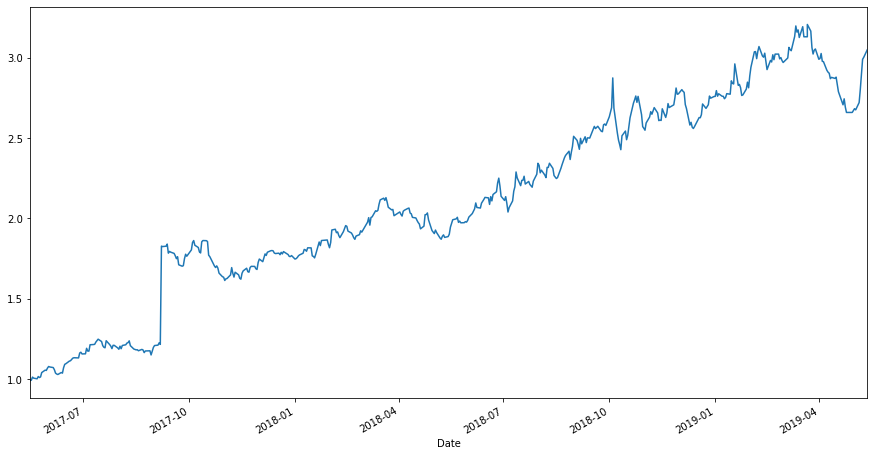

In [49]:
plt.figure(figsize = (15,8))
cumulative_returns = ( 1 + (df_reliance['Close Price'].pct_change() * df_reliance['Action']) ).dropna().cumprod()
cumulative_returns.plot()

<h1> MODULE 4 ENDS here, Thank You </h1>